In [3]:
import os
os.chdir('C:/Users/Dell/Documents/Text Mining')
os.getcwd()

'C:\\Users\\Dell\\Documents\\Text Mining'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  E or I --> Extraversion or Introversion
###  S or N --> Sensing or Intuition
###  T or F --> Thinking or Feeling
###   J or P --> Judging or Perceiving

In [5]:
df=pd.read_csv('C:/Users/Dell/Documents/Text Mining/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
df.groupby('type').agg({'type':'count'})


,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


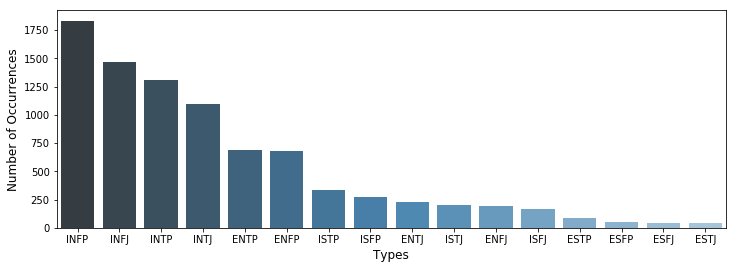

In [39]:
cnt_types = df['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values,palette="Blues_d")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

### Add columns for type indicators

In [46]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = df.join(df.apply (lambda row: get_types (row),axis=1))
data.head(5)


,type,posts,words_per_comment,variance_of_word_counts,LenPre,NumPosts,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,4652,50,1,1,1,0
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,7053,50,0,0,1,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,5265,50,1,0,1,1
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,6271,50,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,6111,50,0,1,1,1


In [47]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


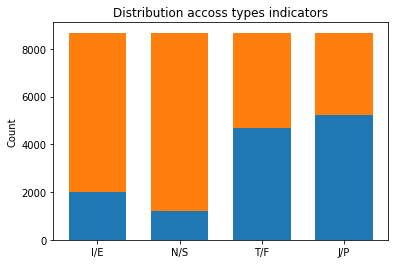

In [48]:
N = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

### Almost no correlation

In [49]:
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


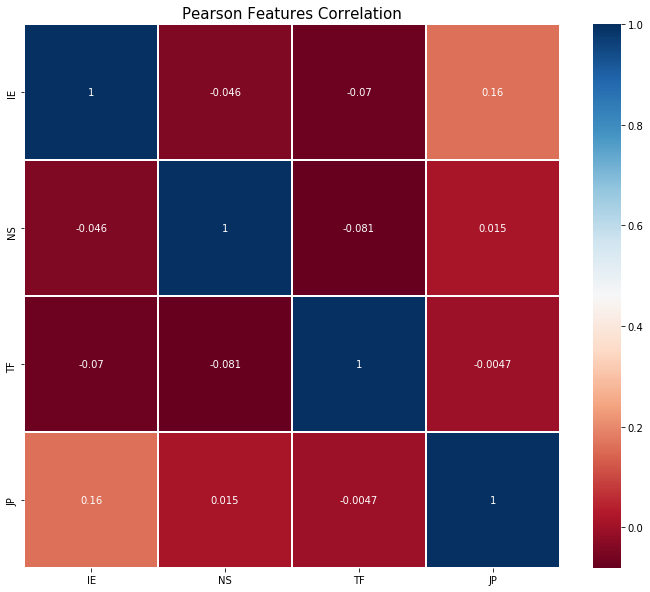

In [50]:
cmap = plt.cm.RdBu
corr = data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)
plt.show()

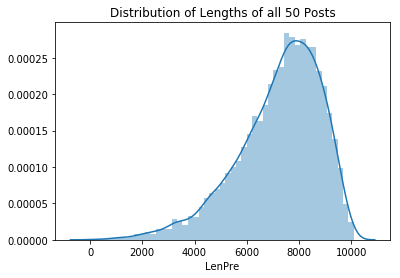

In [40]:
df["LenPre"] = df["posts"].apply(len)
sns.distplot(df["LenPre"]).set_title("Distribution of Lengths of all 50 Posts")
plt.show()

In [6]:
def var_row(row):
    l=[]
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()
        

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


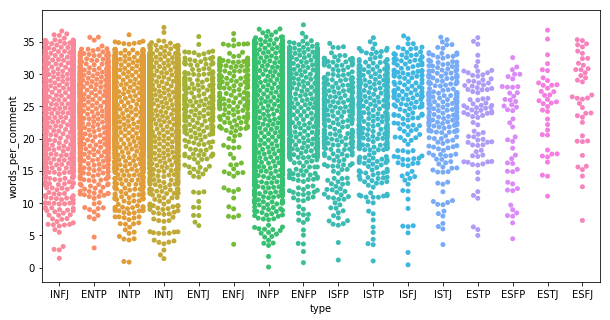

In [8]:
plt.figure(figsize=(10,5))
sns.swarmplot("type", "words_per_comment", data=df)
plt.show()

In [9]:
df_2 = df[~df['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
df_2['qmark_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)
df_2.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,qmark_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.20


In [10]:
print(df_2.groupby('type').agg({'http_per_comment': 'mean'}))
print(df_2.groupby('type').agg({'qmark_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qmark_per_comment
type                   
ENFJ           0.213053
ENFP           0.227259
ENTJ           0.240000
ENTP           0.220964
INFJ           0.208966
INFP           0.202533
INTJ           0.214849
INTP           0.221580
ISFJ           0.200964
ISFP           0.216384
ISTJ           0.214927
ISTP           0.221602


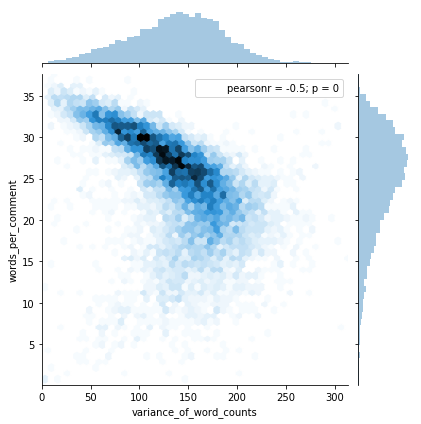

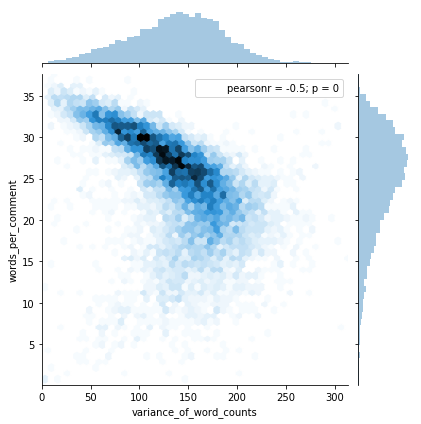

In [12]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_2, kind="hex")
plt.show()

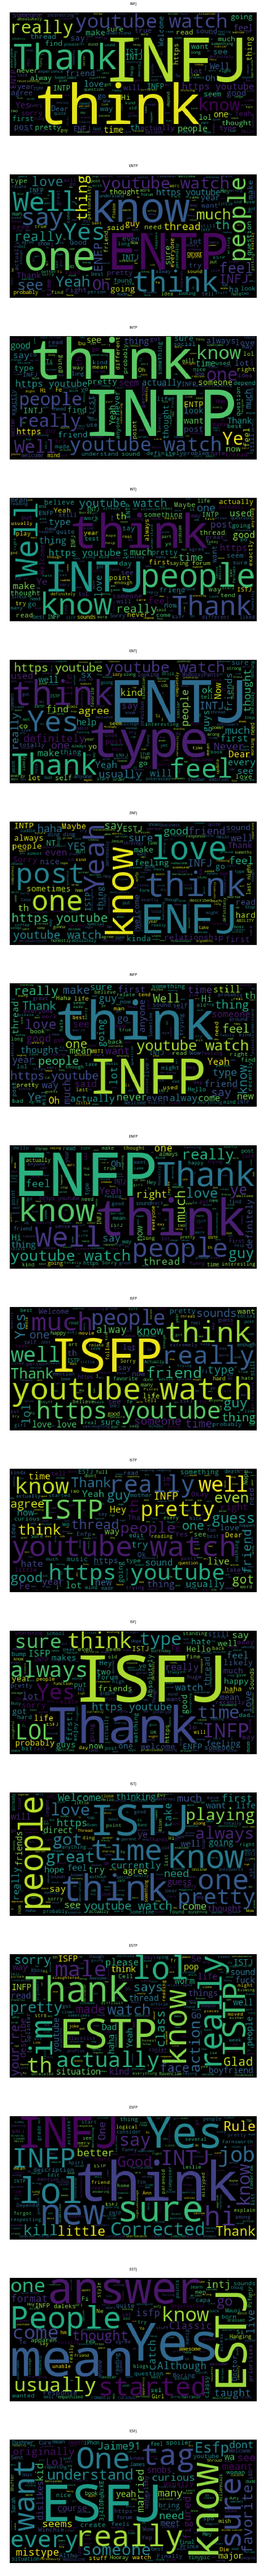

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [14]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1
    
plt.show()

### PreProcessing

In [51]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   variance_of_word_counts  LenPre  NumPosts  I-E  N-S  T-F  J-P  
0                 135.2900    4652       

### Test-Train split

In [59]:
from sklearn.model_selection import train_test_split

XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print(yy.shape)
print(XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

(8675,)
(8675, 7)


### Applying Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print(round(acc_logg,2,), "%")

76.96 %


In [ ]:
# ### Applying Naive Bayes




yp_train = clf.predict(XX_train)
yp_test = clf.predict(XX_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(XX_train, yy_train)

In [ ]:
acc_train=np.mean(yp_train == yy_train)*100
print("Train Accuracy:", round(acc_train,2),"%")

In [ ]:
acc_test=np.mean(yp_test == yy_test)*100
print("Test Accuracy:", round(acc_test,2),"%")
print("******")
#print("Categorical Train Accuracy:", cat_accuracy(yp_train, yy_train, le))
#print("Categorical Test Accuracy:", cat_accuracy(yp_test, yy_test, le))
